In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
from selenium import webdriver
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.time import Time
from datetime import datetime
from tqdm import tqdm
from time import sleep
import pickle

In [3]:
class tns_scraping(object):
    
    def __init__(self):
        self.driver = webdriver.Chrome("/usr/lib/chromium-browser/chromedriver")
        
    def get_reporting_date(self, TNS_name):
        self.driver.get("https://wis-tns.weizmann.ac.il/object/"+str(TNS_name)+"/discovery-cert")
        content = self.driver.page_source
        soup = BeautifulSoup(content)
        text = soup.get_text()
        index = text.find('Date Received')
        size = 40
        full_date = soup.get_text()[index:index+size]
        date, time = full_date.split(" ")[-2:]
        return date, time


In [4]:
all_alerce = pd.read_pickle("all_alerce.pkl")
summary_alerce = pd.read_pickle("alerce_summary_tns.pkl")

In [5]:
all_alerce.columns

Index(['ID', 'Name', 'RA', 'DEC', 'Obj. Type', 'Redshift', 'Host Name',
       'Host Redshift', 'Reporting Group/s', 'Discovery Data Source/s',
       'Classifying Group/s', 'Associated Group/s', 'Disc. Internal Name',
       'Disc. Instrument/s', 'Class. Instrument/s', 'TNS AT', 'Public',
       'End Prop. Period', 'Discovery Mag/Flux', 'Discovery Filter',
       'Discovery Date (UT)', 'Sender', 'Remarks', 'Ext. catalog/s', 'url'],
      dtype='object')

In [6]:
all_alerce["Disc. Internal Name"]

0      ZTF20abblwqe
1      ZTF20abbjwgc
2      ZTF20abbkzkj
3      ZTF20abbkzye
4      ZTF20abblasn
           ...     
357    ZTF19abjklyz
358    ZTF19abjobyp
359    ZTF19abjppqv
360    ZTF19abjpqlc
361    ZTF19abjquxy
Name: Disc. Internal Name, Length: 2841, dtype: object

In [7]:
summary_alerce

,oid,nobs,dt,dt2,dmag,dt_fid,dmag_fid,first_mjd,first_det_mag,ra,dec,dt_first_max,dmag_first_max,mag_at_max,dmdt_fid
0,ZTF20abblwqe,1,0.000475,NaN,1.962393,0.000475,1.962393,58994.265903,18.848707,239.844326,50.876658,0.000000,0.000000,18.848707,4134.835265
1,ZTF20abbjwgc,1,3.018877,NaN,0.729614,8.981343,0.557014,58994.193727,20.171286,169.800081,31.028982,0.000000,0.000000,20.171286,0.062019
2,ZTF20abbkzkj,1,2.933241,NaN,0.097931,2.933241,0.097931,58994.230197,20.298969,208.079012,1.216320,0.000000,0.000000,20.298969,0.033387
3,ZTF20abbkzye,1,2.933241,NaN,0.365911,2.933241,0.365911,58994.230197,20.184088,208.816139,7.704117,0.000000,0.000000,20.184088,0.124746
4,ZTF20abblasn,1,2.932778,NaN,0.255505,2.932778,0.255505,58994.230671,20.334196,199.713757,9.712018,0.000000,0.000000,20.334196,0.087120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2836,ZTF19abjklyz,3,6.858507,9.953102,-0.542484,6.858507,-0.542484,58693.323009,20.741085,330.443201,29.849292,3.094595,0.365274,20.375811,-0.079097
2837,ZTF19abjobyp,1,2.937280,NaN,-0.100792,3.013194,-0.045492,58693.394329,20.273191,336.647484,-5.944884,0.000000,0.000000,20.273191,-0.015098
2838,ZTF19abjppqv,11,2.994062,5.975822,0.305964,2.994062,0.305964,58693.457072,19.898537,18.495533,-2.156206,10.042234,0.545441,19.353096,0.102190
2839,ZTF19abjpqlc,6,7.042199,12.015474,-2.207703,7.042199,-2.207703,58693.459965,20.039202,348.160126,-26.859484,15.021053,0.478817,19.560385,-0.313496


In [8]:
scraper = tns_scraping()

reporting_time = []
reporting_date = []

for ztf_name in tqdm(summary_alerce["oid"]):
    tns_name = all_alerce[all_alerce["Disc. Internal Name"]==ztf_name]
    tns_name = tns_name["Name"].values[0].split(" ")[-1]
    
    rep_date, rep_time = scraper.get_reporting_date(tns_name)
    reporting_time.append(rep_time)
    reporting_date.append(rep_date)
    
    sleep(np.random.uniform(low=0, high=3))

100%|██████████| 2841/2841 [1:49:55<00:00,  2.32s/it]  


In [9]:
import pickle
pickle.dump({"reporting_time": reporting_time, "reporting_date": reporting_date},
           open("alerce_reporting_time.pkl", "wb"),
           protocol=2)

In [10]:
len(reporting_time), len(reporting_date)

(2841, 2841)

In [11]:
scraper = tns_scraping()

all_ztf = pd.read_pickle("all_ztf.pkl")
summary_ztf = pd.read_pickle("ztf_summary_tns.pkl")



In [12]:
len(all_ztf), len(summary_ztf)

(8985, 8764)

In [14]:
reporting_time = []
reporting_date = []

for ztf_name in tqdm(summary_ztf["oid"]):
    tns_name = all_ztf[all_ztf["Disc. Internal Name"]==ztf_name]
    tns_name = tns_name["Name"].values[0].split(" ")[-1]
    
    rep_date, rep_time = scraper.get_reporting_date(tns_name)
    reporting_time.append(rep_time)
    reporting_date.append(rep_date)
    
    sleep(np.random.uniform(low=0, high=3))
    

pickle.dump({"reporting_time": reporting_time, "reporting_date": reporting_date},
           open("ztf_reporting_time.pkl", "wb"),
           protocol=2)

100%|██████████| 8764/8764 [5:31:00<00:00,  2.27s/it]   


# Loading results

In [5]:
all_alerce = pd.read_pickle("all_alerce.pkl")
summary_alerce = pd.read_pickle("alerce_summary_tns.pkl")

all_ztf = pd.read_pickle("all_ztf.pkl")
summary_ztf = pd.read_pickle("ztf_summary_tns.pkl")

reported_alerce = pd.read_pickle("alerce_reporting_time.pkl")
reported_ztf = pd.read_pickle("ztf_reporting_time.pkl")

In [6]:
summary_ztf

,oid,nobs,dt,dt2,dmag,dt_fid,dmag_fid,first_mjd,first_det_mag,ra,dec,dt_first_max,dmag_first_max,mag_at_max,dmdt_fid
0,ZTF20aazcnnw,10,0.885463,0.935174,3.539885,0.885463,3.539885,58979.267477,15.569315,230.547173,24.736869,0.000000,0.000000,15.569315,3.997778
1,ZTF20abazbfr,3,4.999572,5.047164,4.951195,4.999572,4.951195,58991.408171,16.174505,287.530960,35.943955,0.000000,0.000000,16.174505,0.990324
2,ZTF20abavxkq,2,0.042014,5.894468,-0.292700,6.143160,-2.557199,58985.419664,20.926399,262.367751,19.424901,5.852454,2.053091,18.873308,-0.416268
3,ZTF20abbpkng,1,2.081111,NaN,0.629068,2.081111,0.629068,58994.413137,20.046831,258.729306,35.520528,0.000000,0.000000,20.046831,0.302275
4,ZTF20abbckbb,2,0.045891,2.103472,0.994949,4.937859,1.365950,58992.351806,19.720350,254.280560,48.024969,2.057581,0.278284,19.442066,0.276628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8759,ZTF18aaevepq,32,NaN,165.293241,NaN,NaN,NaN,58385.526273,19.157137,137.328876,21.046709,409.022789,0.099051,19.058086,NaN
8760,ZTF18aahqsad,25,NaN,163.306296,NaN,NaN,NaN,58425.481863,19.447134,150.611561,8.822803,87.949884,0.848488,18.598646,NaN
8761,ZTF18aagajuk,62,NaN,160.199433,NaN,NaN,NaN,58423.517199,19.692928,119.739629,28.642448,5.989711,0.327709,19.365219,NaN
8762,ZTF18abgubgi,77,2.993472,5.995382,1.002682,2.993472,1.002682,58318.451620,19.782318,8.173004,40.028423,162.851620,1.156347,18.625971,0.334956


In [7]:
summary_alerce["first_UT"] = summary_alerce.apply(lambda row: float(Time(row["first_mjd"], format='mjd').datetime.hour) + float(Time(row["first_mjd"], format='mjd').datetime.minute) / 60., axis=1)
summary_ztf["first_UT"] = summary_ztf.apply(lambda row: float(Time(row["first_mjd"], format='mjd').datetime.hour) + float(Time(row["first_mjd"], format='mjd').datetime.minute) / 60., axis=1)

In [8]:
reported_alerce["reporting_date"][:5], reported_alerce["reporting_time"][:5]

(['2020-05-25', '2020-05-25', '2020-05-25', '2020-05-25', '2020-05-25'],
 ['18:57:09', '18:57:09', '18:57:09', '18:57:09', '18:57:09'])

In [9]:
alerce_rep_utc = []
for i in range(len(reported_alerce["reporting_date"])):
    alerce_rep_utc.append(reported_alerce["reporting_date"][i]+"T"+reported_alerce["reporting_time"][i])
print(alerce_rep_utc)

['2020-05-25T18:57:09', '2020-05-25T18:57:09', '2020-05-25T18:57:09', '2020-05-25T18:57:09', '2020-05-25T18:57:09', '2020-05-25T18:57:09', '2020-05-25T18:57:09', '2020-05-25T18:57:09', '2020-05-25T18:57:09', '2020-05-25T18:57:09', '2020-05-25T18:57:09', '2020-05-25T18:57:09', '2020-05-25T18:57:09', '2020-05-25T18:57:09', '2020-05-25T18:57:09', '2020-05-25T18:57:09', '2020-05-25T18:57:09', '2020-05-24T21:03:35', '2020-05-24T21:03:35', '2020-05-24T21:03:35', '2020-05-24T21:03:35', '2020-05-24T21:03:35', '2020-05-24T21:03:35', '2020-05-24T21:03:35', '2020-05-24T21:03:35', '2020-05-24T21:03:35', '2020-05-23T18:37:52', '2020-05-23T18:37:52', '2020-05-23T18:37:52', '2020-05-23T18:37:52', '2020-05-23T18:37:52', '2020-05-23T18:37:52', '2020-05-23T18:37:52', '2020-05-23T18:37:52', '2020-05-23T18:37:52', '2020-05-23T18:37:52', '2020-05-23T18:37:52', '2020-05-23T18:37:52', '2020-05-23T18:37:52', '2020-05-23T18:37:52', '2020-05-23T18:37:52', '2020-05-23T18:37:52', '2020-05-23T18:37:52', '2020-05-2

In [10]:
t_alerce = Time(alerce_rep_utc, format='isot', scale='utc')
t_alerce.mjd, len(t_alerce)

(array([58994.7896875 , 58994.7896875 , 58994.7896875 , ...,
        58698.38965278, 58698.38965278, 58698.38965278]),
 2841)

In [11]:
summary_alerce.columns

Index(['oid', 'nobs', 'dt', 'dt2', 'dmag', 'dt_fid', 'dmag_fid', 'first_mjd',
       'first_det_mag', 'ra', 'dec', 'dt_first_max', 'dmag_first_max',
       'mag_at_max', 'dmdt_fid', 'first_UT'],
      dtype='object')

In [12]:
summary_alerce.columns

Index(['oid', 'nobs', 'dt', 'dt2', 'dmag', 'dt_fid', 'dmag_fid', 'first_mjd',
       'first_det_mag', 'ra', 'dec', 'dt_first_max', 'dmag_first_max',
       'mag_at_max', 'dmdt_fid', 'first_UT'],
      dtype='object')

In [13]:
summary_alerce.dt, summary_alerce.first_mjd

(0       0.000475
 1       3.018877
 2       2.933241
 3       2.933241
 4       2.932778
           ...   
 2836    6.858507
 2837    2.937280
 2838    2.994062
 2839    7.042199
 2840    0.027651
 Name: dt, Length: 2841, dtype: float64,
 0       58994.265903
 1       58994.193727
 2       58994.230197
 3       58994.230197
 4       58994.230671
             ...     
 2836    58693.323009
 2837    58693.394329
 2838    58693.457072
 2839    58693.459965
 2840    58693.482431
 Name: first_mjd, Length: 2841, dtype: float64)

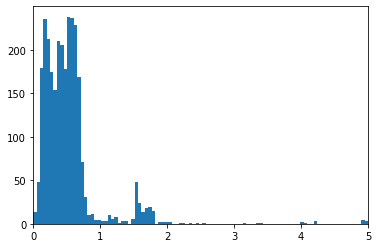

In [14]:
upper_bound = 5
bins = np.linspace(0, upper_bound, num=100)
plt.hist(t_alerce.mjd - summary_alerce.first_mjd, bins=bins)
plt.xlim([0, upper_bound])
plt.show()

In [15]:
ztf_rep_utc = []
for i in range(len(reported_ztf["reporting_date"])):
    ztf_rep_utc.append(reported_ztf["reporting_date"][i]+"T"+reported_ztf["reporting_time"][i])
print(ztf_rep_utc)
t_ztf = Time(ztf_rep_utc, format='isot', scale='utc')
t_ztf.mjd, len(t_ztf)

['2020-05-25T21:46:27', '2020-05-25T20:56:32', '2020-05-25T20:50:08', '2020-05-25T10:47:38', '2020-05-25T10:47:38', '2020-05-25T10:47:38', '2020-05-25T10:47:38', '2020-05-25T07:47:26', '2020-05-25T07:47:26', '2020-05-25T07:47:26', '2020-05-25T06:48:17', '2020-05-24T21:28:02', '2020-05-24T11:46:40', '2020-05-24T11:46:40', '2020-05-24T07:48:21', '2020-05-24T07:48:21', '2020-05-24T07:46:55', '2020-05-24T06:05:57', '2020-05-24T06:05:57', '2020-05-23T09:06:23', '2020-05-23T09:06:13', '2020-05-23T09:06:13', '2020-05-23T08:06:20', '2020-05-23T08:06:20', '2020-05-23T06:05:48', '2020-05-22T12:05:39', '2020-05-22T12:05:39', '2020-05-22T10:05:46', '2020-05-22T06:06:23', '2020-05-22T06:06:23', '2020-05-22T06:06:22', '2020-05-22T05:05:57', '2020-05-22T05:05:53', '2020-05-18T22:22:28', '2020-05-18T12:04:26', '2020-05-18T12:04:26', '2020-05-18T12:04:26', '2020-05-18T12:04:26', '2020-05-18T11:04:48', '2020-05-18T10:04:24', '2020-05-18T10:04:24', '2020-05-18T10:04:24', '2020-05-18T09:04:56', '2020-05-1

(array([58994.90725694, 58994.87259259, 58994.86814815, ...,
        58432.59761574, 58429.61975694, 58270.14756944]),
 8764)

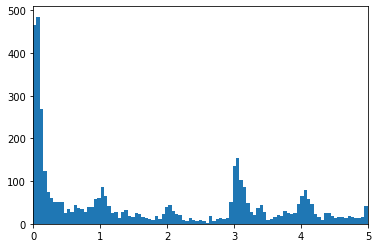

In [16]:
upper_bound = 5
bins = np.linspace(0, upper_bound, num=100)
plt.hist(t_ztf.mjd - summary_ztf.first_mjd, bins=bins)
plt.xlim([0, upper_bound])
plt.show()

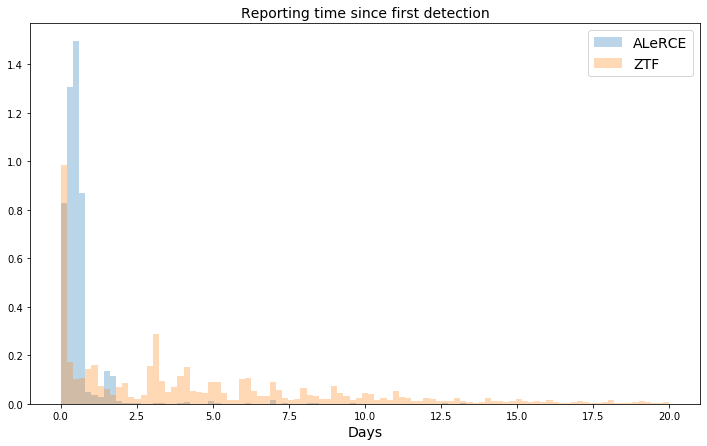

In [17]:
upper_bound=20
bins = np.linspace(0, upper_bound, num=100)
f, ax = plt.subplots(1, 1, figsize=(12, 7))
ax.hist(t_alerce.mjd - summary_alerce.first_mjd, bins=bins, label="ALeRCE", alpha=0.3, density=True)
ax.hist(t_ztf.mjd - summary_ztf.first_mjd, bins=bins, label="ZTF", alpha=0.3, density=True)
ax.set_xlabel("Days", fontsize=14)
ax.set_title("Reporting time since first detection", fontsize=14)
ax.legend(fontsize=14)

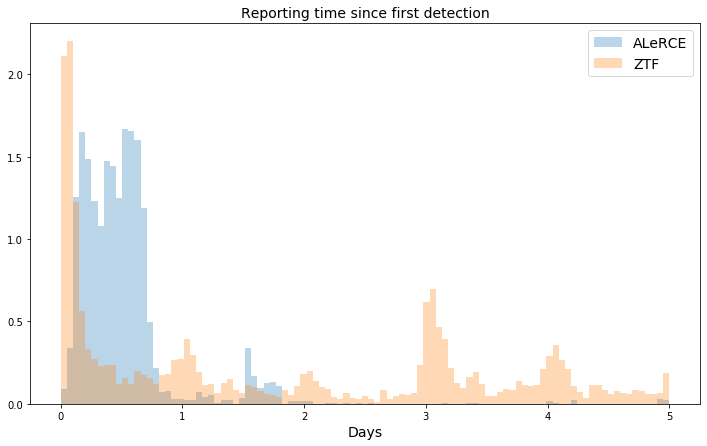

In [18]:
upper_bound=5
bins = np.linspace(0, upper_bound, num=100)
f, ax = plt.subplots(1, 1, figsize=(12, 7))
ax.hist(t_alerce.mjd - summary_alerce.first_mjd, bins=bins, label="ALeRCE", alpha=0.3, density=True)
ax.hist(t_ztf.mjd - summary_ztf.first_mjd, bins=bins, label="ZTF", alpha=0.3, density=True)
ax.set_xlabel("Days", fontsize=14)
ax.set_title("Reporting time since first detection", fontsize=14)
ax.legend(fontsize=14)

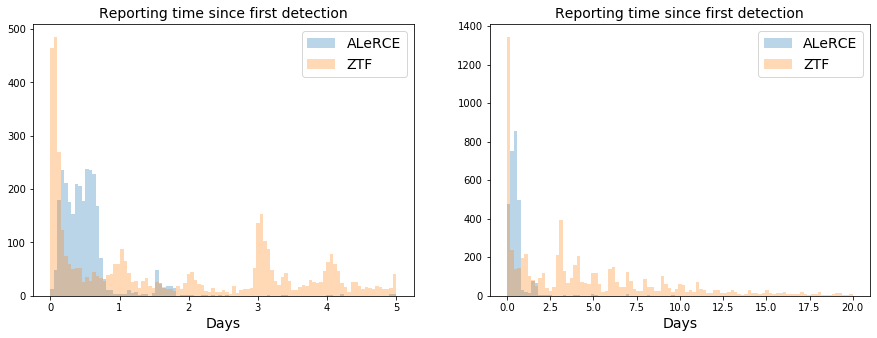

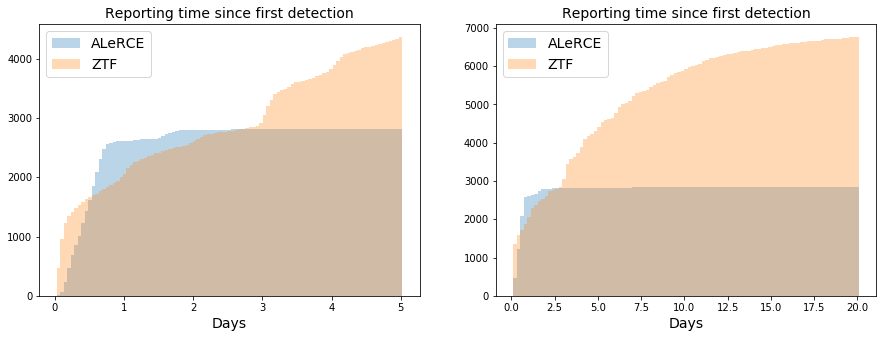

In [19]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))

density_hist = False

upper_bound=5
bins = np.linspace(0, upper_bound, num=100)
alerce_report = t_alerce.mjd - summary_alerce.first_mjd
ztf_report = t_ztf.mjd - summary_ztf.first_mjd

alerce_cum_1, _, _ = ax[0].hist(t_alerce.mjd - summary_alerce.first_mjd, 
                              bins=bins, label="ALeRCE", alpha=0.3, density=density_hist)
ztf_cum_1, _, _ = ax[0].hist(t_ztf.mjd - summary_ztf.first_mjd, 
                           bins=bins, label="ZTF", alpha=0.3, density=density_hist)
ax[0].set_xlabel("Days", fontsize=14)
ax[0].set_title("Reporting time since first detection", fontsize=14)
ax[0].legend(fontsize=14)

upper_bound=20
bins = np.linspace(0, upper_bound, num=100)
alerce_cum_2, _, _ = ax[1].hist(t_alerce.mjd - summary_alerce.first_mjd, bins=bins, label="ALeRCE", alpha=0.3, density=density_hist)
ztf_cum_2, _, _ = ax[1].hist(t_ztf.mjd - summary_ztf.first_mjd, bins=bins, label="ZTF", alpha=0.3, density=density_hist)
ax[1].set_xlabel("Days", fontsize=14)
ax[1].set_title("Reporting time since first detection", fontsize=14)
ax[1].legend(fontsize=14)

plt.show()

if density_hist:
    alerce_cum_1 = alerce_cum_1/np.sum(alerce_cum_1)
    alerce_cum_2 = alerce_cum_2/np.sum(alerce_cum_2)
    ztf_cum_1 = ztf_cum_1/np.sum(ztf_cum_1)
    ztf_cum_2 = ztf_cum_2/np.sum(ztf_cum_2)

#### CUMULATIVE ####
f, ax = plt.subplots(1, 2, figsize=(15, 5))
upper_bound=5
bins = np.linspace(0, upper_bound, num=100)
dbins = np.diff(bins)
width = dbins[0]
ax[0].bar(bins[1:], np.cumsum(alerce_cum_1), label="ALeRCE", alpha=0.3, width=width)
ax[0].bar(bins[1:], np.cumsum(ztf_cum_1), label="ZTF", alpha=0.3, width=width)
ax[0].set_xlabel("Days", fontsize=14)
ax[0].set_title("Reporting time since first detection", fontsize=14)
ax[0].legend(fontsize=14)

upper_bound=20
bins = np.linspace(0, upper_bound, num=100)
dbins = np.diff(bins)
width = dbins[0]
ax[1].bar(bins[1:], np.cumsum(alerce_cum_2), label="ALeRCE", alpha=0.3, width=width)
ax[1].bar(bins[1:], np.cumsum(ztf_cum_2), label="ZTF", alpha=0.3, width=width)
ax[1].set_xlabel("Days", fontsize=14)
ax[1].set_title("Reporting time since first detection", fontsize=14)
ax[1].legend(fontsize=14)
plt.show()

## Reporting time one detection

In [20]:
summary_alerce.columns

Index(['oid', 'nobs', 'dt', 'dt2', 'dmag', 'dt_fid', 'dmag_fid', 'first_mjd',
       'first_det_mag', 'ra', 'dec', 'dt_first_max', 'dmag_first_max',
       'mag_at_max', 'dmdt_fid', 'first_UT'],
      dtype='object')

one detection 876
two detection 1965


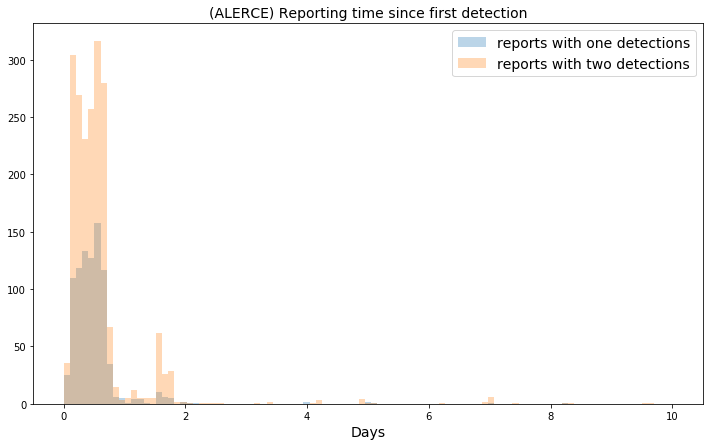

In [21]:
alerce_report_one_dt = []
alerce_report_two_dt = []

for i, d in enumerate(summary_alerce.dt2):
    if np.isnan(d):
        alerce_report_one_dt.append(alerce_report[i])
    else:
        alerce_report_two_dt.append(alerce_report[i])

print("one detection", len(alerce_report_one_dt))
print("two detection", len(alerce_report_two_dt))

upper_bound=10
bins = np.linspace(0, upper_bound, num=100)
f, ax = plt.subplots(1, 1, figsize=(12, 7))
ax.hist(alerce_report_one_dt, bins=bins, label="reports with one detections", alpha=0.3, density=False)
ax.hist(alerce_report_two_dt, bins=bins, label="reports with two detections", alpha=0.3, density=False)
ax.set_xlabel("Days", fontsize=14)
ax.set_title("(ALERCE) Reporting time since first detection", fontsize=14)
ax.legend(fontsize=14)
plt.show()

one detection 362
two detection 8402


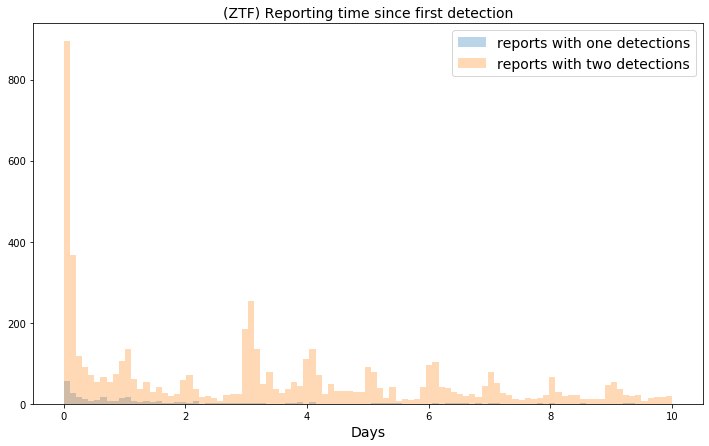

In [22]:
ztf_report_one_dt = []
ztf_report_two_dt = []
single_dt_ztf_reports = []

for i, d in enumerate(summary_ztf.dt2):
    if np.isnan(d):
        ztf_report_one_dt.append(ztf_report[i])
        single_dt_ztf_reports.append(summary_ztf.oid[i])
    else:
        ztf_report_two_dt.append(ztf_report[i])

print("one detection", len(ztf_report_one_dt))
print("two detection", len(ztf_report_two_dt))

upper_bound=10
bins = np.linspace(0, upper_bound, num=100)
f, ax = plt.subplots(1, 1, figsize=(12, 7))
ax.hist(ztf_report_one_dt, bins=bins, label="reports with one detections", alpha=0.3, density=False)
ax.hist(ztf_report_two_dt, bins=bins, label="reports with two detections", alpha=0.3, density=False)
ax.set_xlabel("Days", fontsize=14)
ax.set_title("(ZTF) Reporting time since first detection", fontsize=14)
ax.legend(fontsize=14)
plt.show()

In [23]:
single_dt_ztf_reports

['ZTF20abbpkng',
 'ZTF20abbhtpu',
 'ZTF20aajryap',
 'ZTF20aappiio',
 'ZTF20aaqinre',
 'ZTF20aaqmrub',
 'ZTF20aanloyz',
 'ZTF20aamvnat',
 'ZTF20aalyzmg',
 'ZTF20aahgnpf',
 'ZTF20aadyati',
 'ZTF20aaeihti',
 'ZTF20aakjbvd',
 'ZTF20aaidbez',
 'ZTF18adhejlo',
 'ZTF20aagjqxg',
 'ZTF20aafebsm',
 'ZTF19ackrvio',
 'ZTF20aaefyzd',
 'ZTF20aaeccig',
 'ZTF18acfrxzs',
 'ZTF20aadbwvc',
 'ZTF19aatlzsu',
 'ZTF19abyndjf',
 'ZTF19acbqtue',
 'ZTF19accdgqk',
 'ZTF20aaeyzfp',
 'ZTF19acklbte',
 'ZTF19acymlhi',
 'ZTF19acymaxu',
 'ZTF19acxpxvl',
 'ZTF19acvrnlw',
 'ZTF19acwrnyp',
 'ZTF19acvykiz',
 'ZTF19acwinbf',
 'ZTF19acvvyyh',
 'ZTF19acvvljo',
 'ZTF19acvvjjd',
 'ZTF19acvfvrt',
 'ZTF19acrwxra',
 'ZTF19acrwxju',
 'ZTF19acrwred',
 'ZTF19acrwrbq',
 'ZTF19acrvszx',
 'ZTF19acrwlnc',
 'ZTF19acruoro',
 'ZTF19acryyih',
 'ZTF19acryruw',
 'ZTF19acrymna',
 'ZTF19acrwjeb',
 'ZTF19acqnmjo',
 'ZTF19aajtahi',
 'ZTF19acoaxdr',
 'ZTF19acobeqa',
 'ZTF19acnvoay',
 'ZTF19acmljox',
 'ZTF19acmgoui',
 'ZTF19abyjmhl',
 'ZTF19abakntv

In [24]:
all_alerce.columns

Index(['ID', 'Name', 'RA', 'DEC', 'Obj. Type', 'Redshift', 'Host Name',
       'Host Redshift', 'Reporting Group/s', 'Discovery Data Source/s',
       'Classifying Group/s', 'Associated Group/s', 'Disc. Internal Name',
       'Disc. Instrument/s', 'Class. Instrument/s', 'TNS AT', 'Public',
       'End Prop. Period', 'Discovery Mag/Flux', 'Discovery Filter',
       'Discovery Date (UT)', 'Sender', 'Remarks', 'Ext. catalog/s', 'url'],
      dtype='object')

## Spectroscopically confirmed

In [25]:
alerce_classified_mask = ~(all_alerce["Classifying Group/s"].isna())
ztf_classified_mask = ~(all_ztf["Classifying Group/s"].isna())

ALeRCE confirmed 364
ZTF confirmed 1854


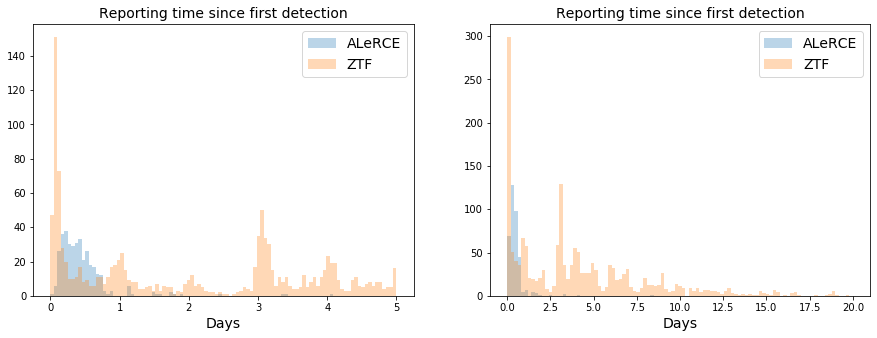

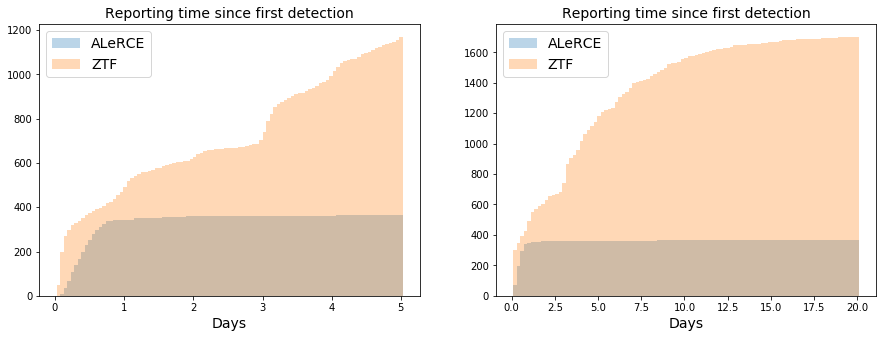

In [26]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))

density_hist = False

upper_bound=5
bins = np.linspace(0, upper_bound, num=100)

alerce_report = []
ztf_report = []

alerce_confirmed_mask = []
ztf_confirmed_mask = []

for i in range(len(summary_ztf)):
    summary_row = summary_ztf.loc[i]
    row = all_ztf[all_ztf["Disc. Internal Name"] == summary_row.oid].iloc[0]
    if isinstance(row["Classifying Group/s"], str):
        ztf_confirmed_mask.append(i)
    else:
        continue
        
for i in range(len(summary_alerce)):
    summary_row = summary_alerce.loc[i]
    row = all_alerce[all_alerce["Disc. Internal Name"] == summary_row.oid].iloc[0]
    if isinstance(row["Classifying Group/s"], str):
        alerce_confirmed_mask.append(i)
    else:
        continue
        

print("ALeRCE confirmed", len(alerce_confirmed_mask))
print("ZTF confirmed", len(ztf_confirmed_mask))
        
alerce_report = t_alerce.mjd - summary_alerce.first_mjd
ztf_report = t_ztf.mjd - summary_ztf.first_mjd

alerce_report = alerce_report[alerce_confirmed_mask]
ztf_report = ztf_report[ztf_confirmed_mask]

alerce_cum_1, _, _ = ax[0].hist(alerce_report, 
                              bins=bins, label="ALeRCE", alpha=0.3, density=density_hist)
ztf_cum_1, _, _ = ax[0].hist(ztf_report, 
                           bins=bins, label="ZTF", alpha=0.3, density=density_hist)
ax[0].set_xlabel("Days", fontsize=14)
ax[0].set_title("Reporting time since first detection", fontsize=14)
ax[0].legend(fontsize=14)

upper_bound=20
bins = np.linspace(0, upper_bound, num=100)
alerce_cum_2, _, _ = ax[1].hist(alerce_report, bins=bins, label="ALeRCE", alpha=0.3, density=density_hist)
ztf_cum_2, _, _ = ax[1].hist(ztf_report, bins=bins, label="ZTF", alpha=0.3, density=density_hist)
ax[1].set_xlabel("Days", fontsize=14)
ax[1].set_title("Reporting time since first detection", fontsize=14)
ax[1].legend(fontsize=14)

plt.show()

if density_hist:
    alerce_cum_1 = alerce_cum_1/np.sum(alerce_cum_1)
    alerce_cum_2 = alerce_cum_2/np.sum(alerce_cum_2)
    ztf_cum_1 = ztf_cum_1/np.sum(ztf_cum_1)
    ztf_cum_2 = ztf_cum_2/np.sum(ztf_cum_2)

#### CUMULATIVE ####
f, ax = plt.subplots(1, 2, figsize=(15, 5))
upper_bound=5
bins = np.linspace(0, upper_bound, num=100)
dbins = np.diff(bins)
width = dbins[0]
ax[0].bar(bins[1:], np.cumsum(alerce_cum_1), label="ALeRCE", alpha=0.3, width=width)
ax[0].bar(bins[1:], np.cumsum(ztf_cum_1), label="ZTF", alpha=0.3, width=width)
ax[0].set_xlabel("Days", fontsize=14)
ax[0].set_title("Reporting time since first detection", fontsize=14)
ax[0].legend(fontsize=14)

upper_bound=20
bins = np.linspace(0, upper_bound, num=100)
dbins = np.diff(bins)
width = dbins[0]
ax[1].bar(bins[1:], np.cumsum(alerce_cum_2), label="ALeRCE", alpha=0.3, width=width)
ax[1].bar(bins[1:], np.cumsum(ztf_cum_2), label="ZTF", alpha=0.3, width=width)
ax[1].set_xlabel("Days", fontsize=14)
ax[1].set_title("Reporting time since first detection", fontsize=14)
ax[1].legend(fontsize=14)
plt.show()

In [27]:
summary_alerce

,oid,nobs,dt,dt2,dmag,dt_fid,dmag_fid,first_mjd,first_det_mag,ra,dec,dt_first_max,dmag_first_max,mag_at_max,dmdt_fid,first_UT
0,ZTF20abblwqe,1,0.000475,NaN,1.962393,0.000475,1.962393,58994.265903,18.848707,239.844326,50.876658,0.000000,0.000000,18.848707,4134.835265,6.366667
1,ZTF20abbjwgc,1,3.018877,NaN,0.729614,8.981343,0.557014,58994.193727,20.171286,169.800081,31.028982,0.000000,0.000000,20.171286,0.062019,4.633333
2,ZTF20abbkzkj,1,2.933241,NaN,0.097931,2.933241,0.097931,58994.230197,20.298969,208.079012,1.216320,0.000000,0.000000,20.298969,0.033387,5.516667
3,ZTF20abbkzye,1,2.933241,NaN,0.365911,2.933241,0.365911,58994.230197,20.184088,208.816139,7.704117,0.000000,0.000000,20.184088,0.124746,5.516667
4,ZTF20abblasn,1,2.932778,NaN,0.255505,2.932778,0.255505,58994.230671,20.334196,199.713757,9.712018,0.000000,0.000000,20.334196,0.087120,5.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2836,ZTF19abjklyz,3,6.858507,9.953102,-0.542484,6.858507,-0.542484,58693.323009,20.741085,330.443201,29.849292,3.094595,0.365274,20.375811,-0.079097,7.750000
2837,ZTF19abjobyp,1,2.937280,NaN,-0.100792,3.013194,-0.045492,58693.394329,20.273191,336.647484,-5.944884,0.000000,0.000000,20.273191,-0.015098,9.450000
2838,ZTF19abjppqv,11,2.994062,5.975822,0.305964,2.994062,0.305964,58693.457072,19.898537,18.495533,-2.156206,10.042234,0.545441,19.353096,0.102190,10.966667
2839,ZTF19abjpqlc,6,7.042199,12.015474,-2.207703,7.042199,-2.207703,58693.459965,20.039202,348.160126,-26.859484,15.021053,0.478817,19.560385,-0.313496,11.033333


# Using one or two detections

In [28]:
all_alerce = pd.read_pickle("all_alerce.pkl")
summary_alerce = pd.read_pickle("alerce_summary_tns.pkl")

all_ztf = pd.read_pickle("all_ztf.pkl")
summary_ztf = pd.read_pickle("ztf_summary_tns.pkl")

reported_alerce = pd.read_pickle("alerce_reporting_time.pkl")
reported_ztf = pd.read_pickle("ztf_reporting_time.pkl")

summary_alerce["first_UT"] = summary_alerce.apply(lambda row: float(Time(row["first_mjd"], format='mjd').datetime.hour) + float(Time(row["first_mjd"], format='mjd').datetime.minute) / 60., axis=1)
summary_ztf["first_UT"] = summary_ztf.apply(lambda row: float(Time(row["first_mjd"], format='mjd').datetime.hour) + float(Time(row["first_mjd"], format='mjd').datetime.minute) / 60., axis=1)

alerce_rep_utc = []
for i in range(len(reported_alerce["reporting_date"])):
    alerce_rep_utc.append(reported_alerce["reporting_date"][i]+"T"+reported_alerce["reporting_time"][i])

t_alerce = Time(alerce_rep_utc, format='isot', scale='utc')
summary_alerce["reporting_mjd"] = t_alerce.mjd

ztf_rep_utc = []
for i in range(len(reported_ztf["reporting_date"])):
    ztf_rep_utc.append(reported_ztf["reporting_date"][i]+"T"+reported_ztf["reporting_time"][i])
t_ztf = Time(ztf_rep_utc, format='isot', scale='utc')
summary_ztf["reporting_mjd"] = t_ztf.mjd

summary_alerce["second_mjd"] = summary_alerce["first_mjd"] + (summary_alerce["dt2"] - summary_alerce["dt"])
summary_ztf["second_mjd"] = summary_ztf["first_mjd"] + (summary_ztf["dt2"] - summary_ztf["dt"])

ztf_confirmed = []
reporting_group = []
for i in range(len(summary_ztf)):
    summary_row = summary_ztf.loc[i]
    row = all_ztf[all_ztf["Disc. Internal Name"] == summary_row.oid].iloc[0]
    reporting_group.append(row["Reporting Group/s"])
    if isinstance(row["Classifying Group/s"], str):
        ztf_confirmed.append(True)
    else:
        ztf_confirmed.append(False)
summary_ztf["confirmed"] = ztf_confirmed
summary_ztf["reporting_group"] = reporting_group

alerce_confirmed = []
reporting_group = []
for i in range(len(summary_alerce)):
    summary_row = summary_alerce.loc[i]
    row = all_alerce[all_alerce["Disc. Internal Name"] == summary_row.oid].iloc[0]
    reporting_group.append(row["Reporting Group/s"])
    if isinstance(row["Classifying Group/s"], str):
        alerce_confirmed.append(True)
    else:
        alerce_confirmed.append(False)
summary_alerce["confirmed"] = alerce_confirmed
summary_alerce["reporting_group"] = reporting_group

In [29]:
np.amax(summary_alerce["first_mjd"])

58994.4215162001

In [30]:
summary_alerce["report_from_first_det"] = summary_alerce.reporting_mjd - summary_alerce.first_mjd
summary_ztf["report_from_first_det"] = summary_ztf.reporting_mjd - summary_ztf.first_mjd
print("average reporting time since first detection")
print(np.mean(summary_alerce.report_from_first_det), 
      np.quantile(summary_alerce.report_from_first_det, 0.25),
      np.quantile(summary_alerce.report_from_first_det, 0.75))

average reporting time since first detection
0.5711171269572937 0.2572916628632811 0.6171527960977983


In [31]:
summary_alerce["one_det_when_rep"] = np.logical_or(summary_alerce.second_mjd > summary_alerce.reporting_mjd, summary_alerce.dt2.isna())
summary_ztf["one_det_when_rep"] = np.logical_or(summary_ztf.second_mjd > summary_ztf.reporting_mjd, summary_ztf.dt2.isna())

print("ALeRCE Reported with one detection")
print(np.sum(summary_alerce.one_det_when_rep))
print("ALeRCE Reported with two detections")
print(np.sum(~summary_alerce.one_det_when_rep))
print("total:", len(summary_alerce))

print("AMPEL Reported with one detection")
print(np.sum(summary_ztf.one_det_when_rep))
print("AMPEL Reported with two detections")
print(np.sum(~summary_ztf.one_det_when_rep))
print("total:", len(summary_alerce))

summary_alerce["one_det_available"] = summary_alerce.dt2.isna()
summary_ztf["one_det_available"] = summary_ztf.dt2.isna()

display(summary_ztf[summary_ztf.report_from_first_det<0])

summary_ztf = summary_ztf[summary_ztf.report_from_first_det > 0]

ALeRCE Reported with one detection
1872
ALeRCE Reported with two detections
969
total: 2841
AMPEL Reported with one detection
963
AMPEL Reported with two detections
7801
total: 2841


,oid,nobs,dt,dt2,dmag,dt_fid,dmag_fid,first_mjd,first_det_mag,ra,...,mag_at_max,dmdt_fid,first_UT,reporting_mjd,second_mjd,confirmed,reporting_group,report_from_first_det,one_det_when_rep,one_det_available
80,ZTF20aazpphd,14,3.108067,4.013032,1.111368,3.131910,0.923567,58984.404896,19.423033,242.714931,...,19.054466,0.294889,9.716667,58983.590590,58985.309861,True,"ZTF, YSE, ATLAS",-0.814306,True,False
258,ZTF20aavvaup,20,2.958403,2.994595,1.797705,3.002824,1.646204,58965.182905,18.934996,147.118268,...,17.784138,0.548219,4.383333,58964.673854,58965.219097,True,"ZTF, ATLAS, Pan-STARRS1",-0.509051,True,False
819,ZTF20aamvoxx,3,2.940787,5.961377,-1.212839,2.940787,-1.212839,58893.161482,19.932539,39.399280,...,19.789900,-0.412420,3.866667,58892.275891,58896.182072,False,ZTF,-0.885590,True,False
820,ZTF20aamvmzj,3,2.978819,5.964502,0.364305,9.000174,-0.079594,58896.132812,20.019794,27.189126,...,20.019794,-0.008844,3.183333,58892.273507,58899.118495,False,ZTF,-3.859306,True,False
821,ZTF20aamvnat,1,2.912674,NaN,-0.318876,2.912674,-0.318876,58893.153993,19.176376,27.239494,...,19.176376,-0.109479,3.683333,58892.273403,NaN,False,ZTF,-0.880590,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,ZTF18aabsyqp,204,0.000926,5.068785,-0.124781,0.000926,-0.124781,58272.166840,19.587681,162.818491,...,18.816990,-134.766881,4.000000,58189.684780,58277.234699,True,ZTF,-82.482060,True,False
8756,ZTF18aabssth,102,NaN,168.357824,NaN,NaN,NaN,58427.476921,19.307535,165.189078,...,18.949932,NaN,11.433333,58189.684780,NaN,True,"ZTF, GaiaAlerts",-237.792141,False,False
8757,ZTF18aaayemw,200,NaN,118.343009,NaN,NaN,NaN,58387.490151,19.448446,134.898318,...,19.081806,NaN,11.750000,58177.318646,NaN,True,ZTF,-210.171505,False,False
8758,ZTF18aaaoaeq,58,5.933611,160.306956,-0.159714,5.933611,-0.159714,58272.165440,19.502014,155.540742,...,19.340698,-0.026917,3.966667,58149.329329,58426.538785,True,"ZTF, Pan-STARRS1",-122.836111,True,False


In [32]:
summary_ztf

,oid,nobs,dt,dt2,dmag,dt_fid,dmag_fid,first_mjd,first_det_mag,ra,...,mag_at_max,dmdt_fid,first_UT,reporting_mjd,second_mjd,confirmed,reporting_group,report_from_first_det,one_det_when_rep,one_det_available
0,ZTF20aazcnnw,10,0.885463,0.935174,3.539885,0.885463,3.539885,58979.267477,15.569315,230.547173,...,15.569315,3.997778,6.416667,58994.907257,58979.317188,False,ZTF,15.639780,False,False
1,ZTF20abazbfr,3,4.999572,5.047164,4.951195,4.999572,4.951195,58991.408171,16.174505,287.530960,...,16.174505,0.990324,9.783333,58994.872593,58991.455764,False,ZTF,3.464421,False,False
2,ZTF20abavxkq,2,0.042014,5.894468,-0.292700,6.143160,-2.557199,58985.419664,20.926399,262.367751,...,18.873308,-0.416268,10.066667,58994.868148,58991.272118,False,ZTF,9.448484,False,False
3,ZTF20abbpkng,1,2.081111,NaN,0.629068,2.081111,0.629068,58994.413137,20.046831,258.729306,...,20.046831,0.302275,9.900000,58994.449745,NaN,False,ZTF,0.036609,True,True
4,ZTF20abbckbb,2,0.045891,2.103472,0.994949,4.937859,1.365950,58992.351806,19.720350,254.280560,...,19.442066,0.276628,8.433333,58994.449745,58994.409387,False,ZTF,2.097940,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,ZTF18aauuqrh,6,21.937859,29.022813,1.676746,21.937859,1.676746,58270.170417,18.787554,186.359331,...,18.787554,0.076432,4.083333,58272.228796,58277.255370,False,ZTF,2.058380,True,False
8759,ZTF18aaevepq,32,NaN,165.293241,NaN,NaN,NaN,58385.526273,19.157137,137.328876,...,19.058086,NaN,12.616667,58442.618009,NaN,False,"ZTF, iPTF",57.091736,False,False
8760,ZTF18aahqsad,25,NaN,163.306296,NaN,NaN,NaN,58425.481863,19.447134,150.611561,...,18.598646,NaN,11.550000,58433.571470,NaN,False,"ZTF, iPTF",8.089607,False,False
8761,ZTF18aagajuk,62,NaN,160.199433,NaN,NaN,NaN,58423.517199,19.692928,119.739629,...,19.365219,NaN,12.400000,58432.597616,NaN,False,"ZTF, iPTF",9.080417,False,False


In [33]:
def purity_single_detection(df):
    one_rep_one_av = np.logical_and(df.one_det_when_rep, df.one_det_available)
    one_rep_two_av = np.logical_and(df.one_det_when_rep, np.logical_not(df.one_det_available))
    two_rep_two_av = np.logical_and(np.logical_not(df.one_det_when_rep), np.logical_not(df.one_det_available))
    print("Reported with one, one det available", np.sum(one_rep_one_av))
    print("Reported with one, two det available", np.sum(one_rep_two_av))
    print("Reported with two, two det available", np.sum(two_rep_two_av))
    print("Reported with two, one det available", np.sum(np.logical_and(np.logical_not(df.one_det_when_rep), df.one_det_available)))
    
    return one_rep_one_av, one_rep_two_av, two_rep_two_av

print("ALeRCE")
alerce_purity = purity_single_detection(summary_alerce)
print("purity using one detection", np.sum(alerce_purity[1])/(np.sum(alerce_purity[:2])))
print("Percentage of report within one day", len(summary_alerce[summary_alerce.report_from_first_det<1]))#/len(summary_alerce))

print("ZTF")
ztf_purity = purity_single_detection(summary_ztf)
print("purity using one detection", np.sum(ztf_purity[1])/(np.sum(ztf_purity[:2])))
print("Percentage of report within one day", len(summary_ztf[summary_ztf.report_from_first_det<1])/len(summary_ztf))

ALeRCE
Reported with one, one det available 876
Reported with one, two det available 996
Reported with two, two det available 969
Reported with two, one det available 0
purity using one detection 0.532051282051282
Percentage of report within one day 2610
ZTF
Reported with one, one det available 342
Reported with one, two det available 471
Reported with two, two det available 7791
Reported with two, one det available 0
purity using one detection 0.5793357933579336
Percentage of report within one day 0.23860994886099487


# Histogram by number of detection when reporting

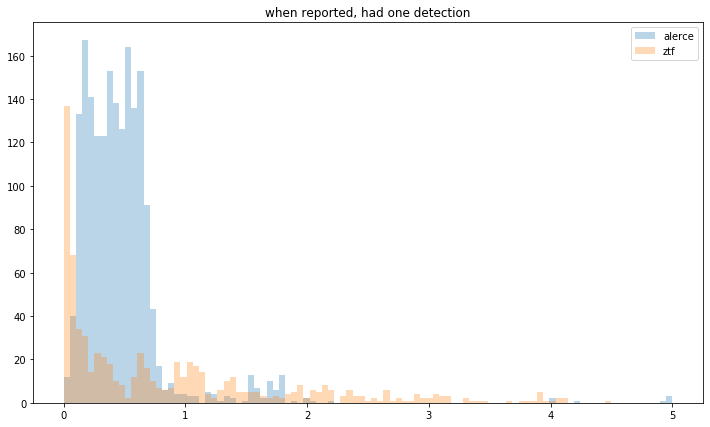

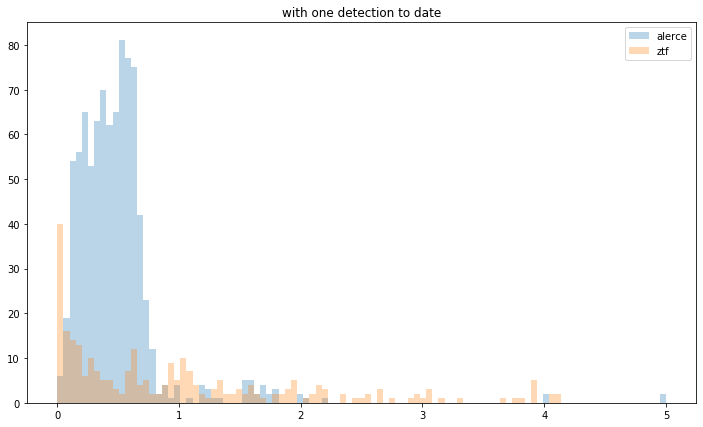

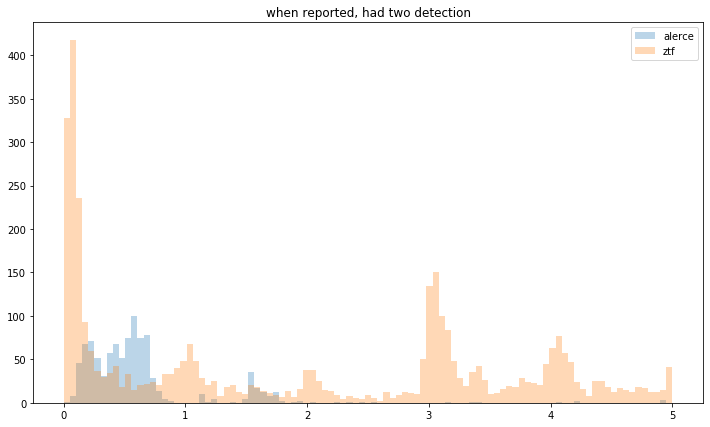

In [34]:
f, ax = plt.subplots(1, 1, figsize=(12, 7))

bins = np.linspace(0, 5, num=100)
density = False
ax.hist(summary_alerce[summary_alerce.one_det_when_rep==1].report_from_first_det, bins=bins, label="alerce", alpha=0.3, density=density)
ax.hist(summary_ztf[summary_ztf.one_det_when_rep==1].report_from_first_det, bins=bins, label="ztf", alpha=0.3, density=density)
plt.legend()
ax.set_title("when reported, had one detection")
plt.show()

f, ax = plt.subplots(1, 1, figsize=(12, 7))

bins = np.linspace(0, 5, num=100)
ax.hist(summary_alerce[summary_alerce.one_det_available==1].report_from_first_det, bins=bins, label="alerce", alpha=0.3, density=density)
ax.hist(summary_ztf[summary_ztf.one_det_available==1].report_from_first_det, bins=bins, label="ztf", alpha=0.3, density=density)
ax.set_title("with one detection to date")
plt.legend()
plt.show()

f, ax = plt.subplots(1, 1, figsize=(12, 7))

bins = np.linspace(0, 5, num=100)
ax.hist(summary_alerce[summary_alerce.one_det_when_rep==0].report_from_first_det, bins=bins, label="alerce", alpha=0.3, density=density)
ax.hist(summary_ztf[summary_ztf.one_det_when_rep==0].report_from_first_det, bins=bins, label="ztf", alpha=0.3, density=density)
plt.legend()
ax.set_title("when reported, had two detection")
plt.show()

# Confirmed with one detection

In [35]:
print("ALeRCE")
print("Confirmed and reported with one detection", np.sum(np.logical_and(summary_alerce.one_det_when_rep, summary_alerce.confirmed)))
print("Reported with one detection", np.sum(summary_alerce.one_det_when_rep))

print("ZTF")
print("Confirmed and reported with one detection", np.sum(np.logical_and(summary_ztf.one_det_when_rep, summary_ztf.confirmed)))
print("Reported with one detection", np.sum(summary_ztf.one_det_when_rep))

ALeRCE
Confirmed and reported with one detection 209
Reported with one detection 1872
ZTF
Confirmed and reported with one detection 107
Reported with one detection 813


# Only by alerce

In [36]:
print(np.unique(all_ztf["Reporting Group/s"].values))
alerce_and_ztf = []
for i in range(len(all_ztf)):
    row = all_ztf.iloc[i]
    if "ALeRCE" in row["Reporting Group/s"]:
        alerce_and_ztf.append(row)
print(alerce_and_ztf)

['ZTF' 'ZTF, ALeRCE' 'ZTF, ALeRCE, ATLAS, Pan-STARRS1, GaiaAlerts'
 'ZTF, ATLAS' 'ZTF, ATLAS, ASAS-SN'
 'ZTF, ATLAS, GOTO, GaiaAlerts, Pan-STARRS1' 'ZTF, ATLAS, GaiaAlerts'
 'ZTF, ATLAS, GaiaAlerts, Pan-STARRS1' 'ZTF, ATLAS, MASTER'
 'ZTF, ATLAS, MASTER, GaiaAlerts, Pan-STARRS1' 'ZTF, ATLAS, PIKA'
 'ZTF, ATLAS, Pan-STARRS1' 'ZTF, ATLAS, Pan-STARRS1, GaiaAlerts'
 'ZTF, ATLAS, Pan-STARRS1, MASTER' 'ZTF, ATLAS, Pan-STARRS1, YSE'
 'ZTF, ATLAS, TNTS, Pan-STARRS1, GaiaAlerts' 'ZTF, ATLAS, YSE'
 'ZTF, ATLAS, YSE, GaiaAlerts' 'ZTF, ATLAS, YSE, GaiaAlerts, Pan-STARRS1'
 'ZTF, ATLAS, YSE, Pan-STARRS1' 'ZTF, GaiaAlerts' 'ZTF, GaiaAlerts, ATLAS'
 'ZTF, GaiaAlerts, ATLAS, GOTO' 'ZTF, GaiaAlerts, ATLAS, Pan-STARRS1'
 'ZTF, GaiaAlerts, ATLAS, YSE' 'ZTF, GaiaAlerts, Pan-STARRS1'
 'ZTF, GaiaAlerts, Pan-STARRS1, ATLAS' 'ZTF, GaiaAlerts, YSE'
 'ZTF, Gattini' 'ZTF, MASTER' 'ZTF, MASTER, Pan-STARRS1, ATLAS'
 'ZTF, Pan-STARRS1' 'ZTF, Pan-STARRS1, ATLAS'
 'ZTF, Pan-STARRS1, ATLAS, GaiaAlerts' 'ZTF, Pan-STARR

In [37]:
only_alerce_mask = summary_alerce["reporting_group"] == "ALeRCE"

In [38]:
summary_alerce[np.logical_and(only_alerce_mask.values, summary_alerce.one_det_available)]

,oid,nobs,dt,dt2,dmag,dt_fid,dmag_fid,first_mjd,first_det_mag,ra,...,mag_at_max,dmdt_fid,first_UT,reporting_mjd,second_mjd,confirmed,reporting_group,report_from_first_det,one_det_when_rep,one_det_available
0,ZTF20abblwqe,1,0.000475,NaN,1.962393,0.000475,1.962393,58994.265903,18.848707,239.844326,...,18.848707,4134.835265,6.366667,58994.789688,NaN,False,ALeRCE,0.523785,True,True
1,ZTF20abbjwgc,1,3.018877,NaN,0.729614,8.981343,0.557014,58994.193727,20.171286,169.800081,...,20.171286,0.062019,4.633333,58994.789688,NaN,False,ALeRCE,0.595961,True,True
2,ZTF20abbkzkj,1,2.933241,NaN,0.097931,2.933241,0.097931,58994.230197,20.298969,208.079012,...,20.298969,0.033387,5.516667,58994.789688,NaN,False,ALeRCE,0.559491,True,True
3,ZTF20abbkzye,1,2.933241,NaN,0.365911,2.933241,0.365911,58994.230197,20.184088,208.816139,...,20.184088,0.124746,5.516667,58994.789688,NaN,False,ALeRCE,0.559491,True,True
4,ZTF20abblasn,1,2.932778,NaN,0.255505,2.932778,0.255505,58994.230671,20.334196,199.713757,...,20.334196,0.087120,5.533333,58994.789688,NaN,False,ALeRCE,0.559016,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2822,ZTF19abjouta,1,3.002928,NaN,-0.088978,9.013762,-1.555578,58693.418924,20.415478,357.880495,...,20.415478,-0.172578,10.050000,58698.389653,NaN,False,ALeRCE,4.970729,True,True
2825,ZTF19abiiitl,1,4.000289,NaN,0.130772,9.935243,-0.342728,58690.168981,19.884129,220.462893,...,19.884129,-0.034496,4.050000,58698.389653,NaN,False,ALeRCE,8.220671,True,True
2828,ZTF19abiypsz,1,5.931678,NaN,-1.007864,5.973715,-0.611263,58691.391968,20.415764,327.400216,...,20.415764,-0.102325,9.400000,58698.389653,NaN,False,ALeRCE,6.997685,True,True
2835,ZTF19abjiqfw,1,1.063553,NaN,-1.384394,4.942685,-0.252893,58693.246447,20.439493,208.340275,...,20.439493,-0.051165,5.900000,58698.389653,NaN,False,ALeRCE,5.143206,True,True


In [39]:
summary_alerce[summary_alerce.one_det_available]

,oid,nobs,dt,dt2,dmag,dt_fid,dmag_fid,first_mjd,first_det_mag,ra,...,mag_at_max,dmdt_fid,first_UT,reporting_mjd,second_mjd,confirmed,reporting_group,report_from_first_det,one_det_when_rep,one_det_available
0,ZTF20abblwqe,1,0.000475,NaN,1.962393,0.000475,1.962393,58994.265903,18.848707,239.844326,...,18.848707,4134.835265,6.366667,58994.789688,NaN,False,ALeRCE,0.523785,True,True
1,ZTF20abbjwgc,1,3.018877,NaN,0.729614,8.981343,0.557014,58994.193727,20.171286,169.800081,...,20.171286,0.062019,4.633333,58994.789688,NaN,False,ALeRCE,0.595961,True,True
2,ZTF20abbkzkj,1,2.933241,NaN,0.097931,2.933241,0.097931,58994.230197,20.298969,208.079012,...,20.298969,0.033387,5.516667,58994.789688,NaN,False,ALeRCE,0.559491,True,True
3,ZTF20abbkzye,1,2.933241,NaN,0.365911,2.933241,0.365911,58994.230197,20.184088,208.816139,...,20.184088,0.124746,5.516667,58994.789688,NaN,False,ALeRCE,0.559491,True,True
4,ZTF20abblasn,1,2.932778,NaN,0.255505,2.932778,0.255505,58994.230671,20.334196,199.713757,...,20.334196,0.087120,5.533333,58994.789688,NaN,False,ALeRCE,0.559016,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2822,ZTF19abjouta,1,3.002928,NaN,-0.088978,9.013762,-1.555578,58693.418924,20.415478,357.880495,...,20.415478,-0.172578,10.050000,58698.389653,NaN,False,ALeRCE,4.970729,True,True
2825,ZTF19abiiitl,1,4.000289,NaN,0.130772,9.935243,-0.342728,58690.168981,19.884129,220.462893,...,19.884129,-0.034496,4.050000,58698.389653,NaN,False,ALeRCE,8.220671,True,True
2828,ZTF19abiypsz,1,5.931678,NaN,-1.007864,5.973715,-0.611263,58691.391968,20.415764,327.400216,...,20.415764,-0.102325,9.400000,58698.389653,NaN,False,ALeRCE,6.997685,True,True
2835,ZTF19abjiqfw,1,1.063553,NaN,-1.384394,4.942685,-0.252893,58693.246447,20.439493,208.340275,...,20.439493,-0.051165,5.900000,58698.389653,NaN,False,ALeRCE,5.143206,True,True


In [40]:
summary_alerce[np.logical_and(only_alerce_mask.values, summary_alerce.confirmed)]

,oid,nobs,dt,dt2,dmag,dt_fid,dmag_fid,first_mjd,first_det_mag,ra,...,mag_at_max,dmdt_fid,first_UT,reporting_mjd,second_mjd,confirmed,reporting_group,report_from_first_det,one_det_when_rep,one_det_available
21,ZTF20abbhyxu,3,0.996493,1.026759,0.150274,1.953380,0.222376,58993.268808,20.361725,243.439730,...,19.651993,0.113842,6.450000,58993.877488,58993.299074,True,ALeRCE,0.608681,False,False
107,ZTF20abaovyz,1,0.880926,NaN,0.199099,0.880926,0.199099,58987.351794,20.452101,280.818697,...,20.452101,0.226011,8.433333,58987.820440,NaN,True,ALeRCE,0.468646,True,True
238,ZTF20aayubpi,10,0.060972,0.071840,-0.067236,3.086482,0.646465,58977.452141,19.146135,304.986649,...,18.121426,0.209451,10.850000,58977.979294,58977.463009,True,ALeRCE,0.527153,False,False
569,ZTF20aauqtcp,12,3.977650,4.013958,-1.563947,3.985729,2.334454,58944.484502,17.214746,298.485322,...,16.885563,0.585703,11.616667,58944.847431,58944.520810,True,ALeRCE,0.362928,False,False
579,ZTF20aauompx,18,3.926910,3.985312,-2.381016,3.957697,-1.192116,58943.431528,19.024015,297.539603,...,18.484976,-0.301215,10.350000,58943.707766,58943.489931,True,ALeRCE,0.276238,False,False
747,ZTF18aarlpzd,34,20.854456,23.809097,1.512262,21.039363,1.586662,58936.263715,17.828037,172.126809,...,16.476618,0.075414,6.316667,58938.037535,58939.218356,True,ALeRCE,1.773819,True,False
822,ZTF20aasnzni,1,8.132326,NaN,1.681894,18.005660,1.990294,58913.424607,17.907906,179.863878,...,17.907906,0.110537,10.183333,58913.742303,NaN,True,ALeRCE,0.317697,True,True
955,ZTF20aaodhzr,2,6.957338,26.022292,-0.642729,6.979097,-0.218029,58895.479919,18.751329,214.768373,...,18.751329,-0.031240,11.516667,58895.702778,58914.544873,True,ALeRCE,0.222859,True,False
999,ZTF20aanafck,6,NaN,5.988461,NaN,NaN,NaN,58892.529074,18.568897,295.503721,...,18.568897,NaN,12.683333,58892.855775,NaN,True,ALeRCE,0.326701,False,False
1004,ZTF20aamxhlg,9,6.096551,8.975961,-0.144323,7.103183,-0.919825,58892.282789,19.447424,88.857075,...,19.447424,-0.129495,6.783333,58892.855775,58895.162199,True,ALeRCE,0.572986,True,False


In [41]:
summary_alerce[np.logical_and(~only_alerce_mask.values, summary_alerce.confirmed)]

,oid,nobs,dt,dt2,dmag,dt_fid,dmag_fid,first_mjd,first_det_mag,ra,...,mag_at_max,dmdt_fid,first_UT,reporting_mjd,second_mjd,confirmed,reporting_group,report_from_first_det,one_det_when_rep,one_det_available
63,ZTF20abavxpk,5,3.843102,3.888750,1.980598,3.941586,1.780998,58991.273056,18.997002,259.121633,...,18.798691,0.451848,6.550000,58991.871400,58991.318704,True,"ALeRCE, ZTF, ATLAS",0.598345,False,False
80,ZTF20abapyxl,5,0.065637,3.933241,0.589100,1.984850,0.567699,58987.404514,19.990801,263.140503,...,19.148333,0.286016,9.700000,58987.820440,58991.272118,True,"ALeRCE, ATLAS, ZTF",0.415926,True,False
165,ZTF20aazpapu,5,2.923750,5.935127,0.429039,2.923750,0.429039,58983.393056,19.838661,295.195350,...,18.777245,0.146743,9.433333,58983.807593,58986.404433,True,"ALeRCE, ATLAS",0.414537,True,False
166,ZTF20aazoqmh,11,4.025127,6.067581,0.371021,4.025127,0.371021,58983.364919,18.930279,268.204920,...,17.493435,0.092176,8.750000,58983.807593,58985.407373,True,"ALeRCE, Pan-STARRS1, ZTF, ATLAS",0.442674,True,False
196,ZTF20aazgxgk,7,2.982280,3.031898,-2.220980,6.002349,-0.145580,58980.196204,19.902679,171.839191,...,18.447655,-0.024254,4.700000,58980.854120,58980.245822,True,"ALeRCE, ZTF",0.657917,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2774,ZTF19abmolyr,49,0.073947,3.014062,1.418861,6.019282,1.565561,58700.476632,19.458038,355.320034,...,17.026442,0.260091,11.433333,58700.705799,58703.416748,True,"ALeRCE, ISSP, GaiaAlerts, ATLAS, Pan-STARRS1, ZTF",0.229167,True,False
2787,ZTF19abnktws,11,5.965359,10.951447,0.957886,9.007222,0.806387,58700.176354,19.583714,236.679783,...,18.585630,0.089527,4.216667,58700.705799,58705.162442,True,"ALeRCE, ATLAS",0.529444,True,False
2797,ZTF19abjrjdw,25,3.991539,11.085243,2.326248,3.991539,2.326248,58698.169792,18.128851,257.774103,...,17.896830,0.582795,4.066667,58698.389653,58705.263495,True,"ALeRCE, ATLAS, GaiaAlerts",0.219861,True,False
2814,ZTF19ablqnuw,12,3.002072,9.943970,0.737362,3.002072,0.737362,58696.482211,19.882038,13.039999,...,18.977749,0.245618,11.566667,58698.389653,58703.424109,True,"ALeRCE, ATLAS, Pan-STARRS1",1.907442,True,False


In [42]:
np.sum(summary_ztf.one_det_when_rep)

813

In [43]:
print(np.sum(summary_alerce.one_det_when_rep)/len(summary_alerce))
print(np.sum(summary_ztf.one_det_when_rep)/len(summary_ztf))

np.sum(summary_ztf.one_det_when_rep)

0.6589229144667371
0.09449093444909344


813

In [44]:
# Detectamos mas rápido, 75% de los reportado es con una deteccion
# La mitad de las reportadas con una detección tienen más de dos detecciones (buenos candidates)
# La otra mitad podrían serlo
# Tenemos desventaja sobre datos privados, cuello de botella
# Muchos de los candidates reportados con una detección fueron reportados por otros grupos
# Somos capaces de entregar buenos candidatos, segunda fotometria para saber si es que hay algo

# Formated plot for paper

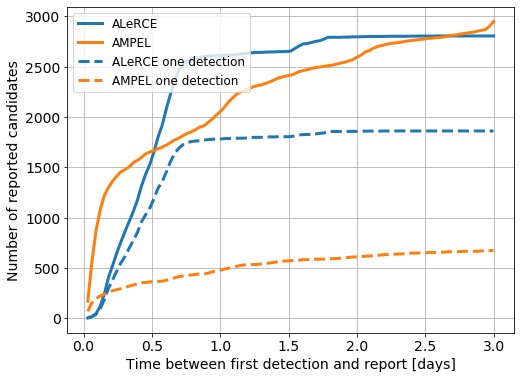

In [45]:
f, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.grid()
density=False
upper_bound = 3
bins = np.linspace(0, upper_bound, num=100)

alerce_full, _ = np.histogram(summary_alerce.report_from_first_det, bins=bins, density=density)
ztf_full, _ = np.histogram(summary_ztf.report_from_first_det, bins=bins, density=density)

alerce_one_dt, _ = np.histogram(summary_alerce[summary_alerce.one_det_when_rep].report_from_first_det, bins=bins, density=density)
ztf_one_dt, _ = np.histogram(summary_ztf[summary_ztf.one_det_when_rep].report_from_first_det, bins=bins, density=density)

ax.plot(bins[1:], np.cumsum(alerce_full), "C0" ,label="ALeRCE", lw=3)
ax.plot(bins[1:], np.cumsum(ztf_full), "C1" ,label="AMPEL", lw=3)
ax.plot(bins[1:], np.cumsum(alerce_one_dt), "C0--" ,label="ALeRCE one detection", lw=3)
ax.plot(bins[1:], np.cumsum(ztf_one_dt), "C1--" ,label="AMPEL one detection", lw=3)
plt.legend(fontsize=12)
plt.tick_params(labelsize=14)
ax.set_ylabel("Number of reported candidates", fontsize=14)
ax.set_xlabel("Time between first detection and report [days]", fontsize=14)
plt.savefig("plots/reporting_time.pdf", bbox_inches="tight")
plt.show()

In [46]:
for i in range(len(all_ztf)):
    name = all_ztf.iloc[i]["Name"].split(" ")[-1]
    print("https://wis-tns.weizmann.ac.il/object/"+name+"/discovery-cert")

https://wis-tns.weizmann.ac.il/object/2020lbe/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020lbd/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020lbc/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020kzs/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020kzr/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020kzq/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020kzp/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020kzo/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020kzn/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020kzm/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020kzk/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020kzd/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020kym/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020kxt/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020kxs/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020kxi/discovery-cert
https://wis-tns.weizmann

https://wis-tns.weizmann.ac.il/object/2020chh/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020chg/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020chf/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020che/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020chd/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020chc/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020chb/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020cha/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020cgz/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020cgy/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020cgx/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020cgw/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020cgu/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020cel/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020cek/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020cej/discovery-cert
https://wis-tns.weizmann

https://wis-tns.weizmann.ac.il/object/2019wux/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019wuw/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019wuv/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019wuu/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019wut/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019wus/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019wur/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019wuq/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019wup/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019wuo/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019wun/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019wum/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019wul/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019wuk/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019wuj/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019wui/discovery-cert
https://wis-tns.weizmann

https://wis-tns.weizmann.ac.il/object/2019str/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019stq/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019stp/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019sto/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019stn/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019stm/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019stl/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019stk/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019stj/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019sti/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019sth/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019stg/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019stf/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019ste/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019std/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019stc/discovery-cert
https://wis-tns.weizmann

https://wis-tns.weizmann.ac.il/object/2019ofj/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019ofi/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019ofh/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019oeo/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019oen/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019oem/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019odp/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019odo/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019odn/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019odm/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019odh/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019odg/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019odf/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019ode/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019odd/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019ock/discovery-cert
https://wis-tns.weizmann

https://wis-tns.weizmann.ac.il/object/2019kcy/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019kcw/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019kcu/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019kct/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019kar/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019kab/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019kaa/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019jzz/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019jzy/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019jzx/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019jzw/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019jzv/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019jzu/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019jzq/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019jzp/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019jzm/discovery-cert
https://wis-tns.weizmann

https://wis-tns.weizmann.ac.il/object/2019emt/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019ems/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019emr/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019emq/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019emp/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019emo/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019emn/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019emm/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019eml/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019emk/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019emj/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019emi/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019emg/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019emf/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019eme/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019emd/discovery-cert
https://wis-tns.weizmann

https://wis-tns.weizmann.ac.il/object/2019cge/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019cgd/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019cgc/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019cgb/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019cga/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019cfz/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019cfy/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019cfx/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019cfw/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019cfv/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019cfu/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019cft/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019cfs/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019cfr/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019cfq/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019cfp/discovery-cert
https://wis-tns.weizmann

https://wis-tns.weizmann.ac.il/object/2018loq/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018lop/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018loo/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018lon/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018lom/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018lol/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018lok/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018loj/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018loi/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018loh/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018log/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018lof/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018loe/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018lod/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018loc/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018lob/discovery-cert
https://wis-tns.weizmann

https://wis-tns.weizmann.ac.il/object/2018jch/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018jcg/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018jcf/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018jce/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018jcd/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018jcc/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018jcb/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018jca/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018jbz/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018jby/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018jbx/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018jbw/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018jbv/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018jbu/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018jbt/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018jbs/discovery-cert
https://wis-tns.weizmann

https://wis-tns.weizmann.ac.il/object/2018faa/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018ezz/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018ezy/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018eva/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018euz/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018euc/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018eub/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018eua/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018etz/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018ety/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018etx/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018etw/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018etv/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018etu/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018ett/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018ets/discovery-cert
https://wis-tns.weizmann

In [47]:
ampel_only = all_ztf[np.logical_or(all_ztf["Sender"]=='ZTF_AMPEL_COMPLETE', all_ztf["Sender"]=='ZTF_AMPEL_NEW')]
ampel_only

,ID,Name,RA,DEC,Obj. Type,Redshift,Host Name,Host Redshift,Reporting Group/s,Discovery Data Source/s,...,TNS AT,Public,End Prop. Period,Discovery Mag/Flux,Discovery Filter,Discovery Date (UT),Sender,Remarks,Ext. catalog/s,url
3,60581,AT 2020kzs,17:14:55.027,+35:31:13.77,NaN,NaN,NaN,NaN,ZTF,ZTF,...,1,1,NaN,19.3400,r-ZTF,2020-05-25 07:32:50.208,ZTF_AMPEL_NEW,NaN,"TESS-active sector/s (24,25);TESS-Sector24;TES...",http://alerce.online/object/ZTF20abbpkng
4,60580,AT 2020kzr,16:57:07.341,+48:01:29.89,NaN,NaN,NaN,NaN,ZTF,ZTF,...,1,1,NaN,19.7200,g-ZTF,2020-05-23 08:26:36.384,ZTF_AMPEL_NEW,NaN,"TESS-active sector/s (24,25);TESS-Sector24;TES...",http://alerce.online/object/ZTF20abbckbb
5,60579,AT 2020kzq,18:12:37.549,+73:40:54.84,NaN,NaN,NaN,NaN,ZTF,ZTF,...,1,1,NaN,19.6900,g-ZTF,2020-05-23 08:22:31.872,ZTF_AMPEL_NEW,NaN,"TESS-active sector/s (24,25);TESS-Sector24;TES...",http://alerce.online/object/ZTF20abazgun
6,60578,AT 2020kzp,17:10:17.442,+51:50:34.21,NaN,NaN,NaN,NaN,ZTF,ZTF,...,1,1,NaN,19.3800,r-ZTF,2020-05-25 07:36:53.856,ZTF_AMPEL_NEW,NaN,"TESS-active sector/s (24,25);TESS-Sector24;TES...",http://alerce.online/object/ZTF20abawtpy
7,60577,AT 2020kzo,15:20:51.257,+33:25:28.30,NaN,NaN,NaN,NaN,ZTF,ZTF,...,1,1,NaN,19.8300,g-ZTF,2020-05-22 07:18:23.616,ZTF_AMPEL_NEW,NaN,"TESS-active sector/s (24,25);TESS-Sector24;TES...",http://alerce.online/object/ZTF20abbeeyt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,30869,AT 2018hzz,06:38:32.063,+43:30:06.69,NaN,NaN,NaN,NaN,ZTF,ZTF,...,1,1,NaN,19.2629,r-ZTF,2018-10-31 08:35:23.000,ZTF_AMPEL_NEW,NaN,NaN,http://alerce.online/object/ZTF18aadrhsi
480,19021,AT 2017bxh,09:09:18.942,+21:02:47.84,NaN,NaN,NaN,NaN,"ZTF, iPTF","ZTF, iPTF",...,1,1,NaN,19.5437,r-ZTF,2018-11-03 11:57:57.000,ZTF_AMPEL_NEW,NaN,NaN,http://alerce.online/object/ZTF18aaevepq
481,18999,AT 2017bwl,10:02:26.762,+08:49:22.22,NaN,NaN,NaN,NaN,"ZTF, iPTF","ZTF, iPTF",...,1,1,NaN,19.8464,r-ZTF,2018-11-03 11:33:52.000,ZTF_AMPEL_NEW,NaN,NaN,http://alerce.online/object/ZTF18aahqsad
482,17172,AT 2017ev,07:58:57.508,+28:38:32.84,NaN,NaN,NaN,NaN,"ZTF, iPTF","ZTF, iPTF",...,1,1,NaN,19.3652,r-ZTF,2018-11-01 12:24:46.000,ZTF_AMPEL_NEW,NaN,NaN,http://alerce.online/object/ZTF18aagajuk


In [48]:
summary_ztf[summary_ztf.one_det_when_rep]

,oid,nobs,dt,dt2,dmag,dt_fid,dmag_fid,first_mjd,first_det_mag,ra,...,mag_at_max,dmdt_fid,first_UT,reporting_mjd,second_mjd,confirmed,reporting_group,report_from_first_det,one_det_when_rep,one_det_available
3,ZTF20abbpkng,1,2.081111,NaN,0.629068,2.081111,0.629068,58994.413137,20.046831,258.729306,...,20.046831,0.302275,9.900000,58994.449745,NaN,False,ZTF,0.036609,True,True
14,ZTF20abbhtpu,1,6.089803,NaN,3.469780,12.046493,3.212481,58993.255081,16.738520,161.386895,...,16.738520,0.266674,6.116667,58993.325243,NaN,False,ZTF,0.070162,True,True
66,ZTF20aazvxww,5,5.022500,6.932893,-0.159510,5.022500,-0.159510,58985.421076,20.053509,258.707774,...,18.980108,-0.031759,10.100000,58985.461470,58987.331470,False,ZTF,0.040394,True,False
118,ZTF20aayrobw,6,2.932373,5.963368,0.237999,2.972338,0.239100,58977.156724,19.589701,142.804987,...,18.559095,0.080442,3.750000,58979.917558,58980.187720,False,"ZTF, ATLAS",2.760833,True,False
180,ZTF20aaxyuwq,9,5.959086,9.988889,1.422283,8.973762,1.198883,58971.158079,19.270317,128.654825,...,18.575144,0.133599,3.783333,58972.000833,58975.187882,False,"ZTF, ATLAS, GaiaAlerts",0.842755,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8690,ZTF18aavskyg,76,6.017639,8.979641,0.285265,6.017639,0.285265,58273.332593,18.705135,233.309557,...,18.264584,0.047405,7.966667,58274.262812,58276.294595,False,ZTF,0.930220,True,False
8691,ZTF18aauzpvc,4,0.079653,9.063090,2.243212,2.975949,0.611813,58272.333391,18.568188,253.735233,...,18.568188,0.205586,8.000000,58273.146852,58281.316829,False,ZTF,0.813461,True,False
8692,ZTF18aaxkfos,11,5.954178,9.983611,1.195122,NaN,NaN,58272.193437,18.510778,160.337981,...,18.240606,NaN,4.633333,58273.146493,58276.222870,True,"ZTF, ATLAS",0.953056,True,False
8695,ZTF18aaisuhc,80,11.997153,20.031134,0.814322,11.997153,0.814322,58272.166377,18.907179,172.212698,...,18.574675,0.067876,3.983333,58273.145903,58280.200359,False,"ZTF, ATLAS",0.979525,True,False


In [49]:
for i in range(len(all_ztf)):
    name = all_ztf.iloc[i]["Name"].split(" ")[-1]
    print("https://wis-tns.weizmann.ac.il/object/"+name+"/discovery-cert")

https://wis-tns.weizmann.ac.il/object/2020lbe/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020lbd/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020lbc/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020kzs/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020kzr/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020kzq/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020kzp/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020kzo/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020kzn/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020kzm/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020kzk/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020kzd/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020kym/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020kxt/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020kxs/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020kxi/discovery-cert
https://wis-tns.weizmann

https://wis-tns.weizmann.ac.il/object/2020cjz/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020cjy/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020cjv/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020cjh/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020cjg/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020cjf/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020cje/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020cjd/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020cjc/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020cjb/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020cja/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020ciz/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020ciy/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020cix/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020ciw/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020civ/discovery-cert
https://wis-tns.weizmann

https://wis-tns.weizmann.ac.il/object/2019wuq/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019wup/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019wuo/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019wun/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019wum/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019wul/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019wuk/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019wuj/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019wui/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019wuh/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019wrt/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019wrs/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019wrr/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019wrq/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019wrp/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019wro/discovery-cert
https://wis-tns.weizmann

https://wis-tns.weizmann.ac.il/object/2019snj/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019snh/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019sng/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019snf/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019sne/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019snd/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019smz/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019smy/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019smx/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019smw/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019smv/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019smu/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019smt/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019sms/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019smr/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019smm/discovery-cert
https://wis-tns.weizmann

https://wis-tns.weizmann.ac.il/object/2019ntl/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019ntk/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019ntj/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019nti/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019nth/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019nrn/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019nrm/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019nrl/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019nrk/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019nrj/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019nqu/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019nql/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019nqk/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019nqj/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019nqi/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019npx/discovery-cert
https://wis-tns.weizmann

https://wis-tns.weizmann.ac.il/object/2019icd/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019icc/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019icb/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019ica/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019ibz/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019iby/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019ibx/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019ibw/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019ibf/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019ibe/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019ibd/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019ibc/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019ibb/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019iba/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019iaz/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019iay/discovery-cert
https://wis-tns.weizmann

https://wis-tns.weizmann.ac.il/object/2019ead/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019eac/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019eab/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019eaa/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019dzz/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019dzy/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019dzx/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019dzw/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019dzs/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019dzr/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019dzq/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019dzp/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019dzo/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019dzn/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019dzm/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019dzl/discovery-cert
https://wis-tns.weizmann

https://wis-tns.weizmann.ac.il/object/2019byj/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019byi/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019byh/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019byg/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019byf/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019bye/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019byd/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019byc/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019bxr/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019bxq/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019bxp/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019bxo/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019bxn/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019bxm/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019bxl/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019bxk/discovery-cert
https://wis-tns.weizmann

https://wis-tns.weizmann.ac.il/object/2018ljr/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018ljq/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018ljp/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018ljo/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018ljn/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018ljm/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018ljl/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018ljk/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018ljj/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018lji/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018ljh/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018ljg/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018ljf/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018lje/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018ljd/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018ljc/discovery-cert
https://wis-tns.weizmann

https://wis-tns.weizmann.ac.il/object/2018itb/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018ita/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018isz/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018isy/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018isx/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018isw/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018isv/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018isp/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018iso/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018isn/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018ism/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018isl/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018isk/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018isj/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018isi/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018ish/discovery-cert
https://wis-tns.weizmann

https://wis-tns.weizmann.ac.il/object/2018cnx/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018cnw/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018cjl/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018ciz/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018ciy/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018cix/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018ciw/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018civ/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018ciu/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018cit/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018cis/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018cir/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018cim/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018cih/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018cig/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018chf/discovery-cert
https://wis-tns.weizmann

In [50]:
all_ztf.set_index('Disc. Internal Name', inplace=True)

In [51]:
for i in range(len(summary_ztf)):
    if summary_ztf.iloc[i].one_det_available:
        oid = summary_ztf.iloc[i].oid
        name = all_ztf.loc[oid]["Name"].split(" ")[-1]
        print("ZTF Object ID:", oid)
        print("https://wis-tns.weizmann.ac.il/object/"+name+"/discovery-cert")
        print("https://alerce.online/object/"+oid)
        print("")

ZTF Object ID: ZTF20abbpkng
https://wis-tns.weizmann.ac.il/object/2020kzs/discovery-cert
https://alerce.online/object/ZTF20abbpkng

ZTF Object ID: ZTF20abbhtpu
https://wis-tns.weizmann.ac.il/object/2020kxi/discovery-cert
https://alerce.online/object/ZTF20abbhtpu

ZTF Object ID: ZTF20aajryap
https://wis-tns.weizmann.ac.il/object/2020hfo/discovery-cert
https://alerce.online/object/ZTF20aajryap

ZTF Object ID: ZTF20aappiio
https://wis-tns.weizmann.ac.il/object/2020fum/discovery-cert
https://alerce.online/object/ZTF20aappiio

ZTF Object ID: ZTF20aaqinre
https://wis-tns.weizmann.ac.il/object/2020eis/discovery-cert
https://alerce.online/object/ZTF20aaqinre

ZTF Object ID: ZTF20aaqmrub
https://wis-tns.weizmann.ac.il/object/2020dlf/discovery-cert
https://alerce.online/object/ZTF20aaqmrub

ZTF Object ID: ZTF20aanloyz
https://wis-tns.weizmann.ac.il/object/2020cuf/discovery-cert
https://alerce.online/object/ZTF20aanloyz

ZTF Object ID: ZTF20aalyzmg
https://wis-tns.weizmann.ac.il/object/2020bvt/di

https://wis-tns.weizmann.ac.il/object/2019std/discovery-cert
https://alerce.online/object/ZTF19acexxof

ZTF Object ID: ZTF19aaslphi
https://wis-tns.weizmann.ac.il/object/2019sno/discovery-cert
https://alerce.online/object/ZTF19aaslphi

ZTF Object ID: ZTF19aaslszp
https://wis-tns.weizmann.ac.il/object/2019snj/discovery-cert
https://alerce.online/object/ZTF19aaslszp

ZTF Object ID: ZTF19acdlcqo
https://wis-tns.weizmann.ac.il/object/2019shg/discovery-cert
https://alerce.online/object/ZTF19acdlcqo

ZTF Object ID: ZTF19acctkvw
https://wis-tns.weizmann.ac.il/object/2019rvy/discovery-cert
https://alerce.online/object/ZTF19acctkvw

ZTF Object ID: ZTF19acbsndo
https://wis-tns.weizmann.ac.il/object/2019rqm/discovery-cert
https://alerce.online/object/ZTF19acbsndo

ZTF Object ID: ZTF19acblnwd
https://wis-tns.weizmann.ac.il/object/2019rnj/discovery-cert
https://alerce.online/object/ZTF19acblnwd

ZTF Object ID: ZTF19acavpcc
https://wis-tns.weizmann.ac.il/object/2019qvs/discovery-cert
https://alerce.

ZTF Object ID: ZTF18acdepjk
https://wis-tns.weizmann.ac.il/object/2019hnd/discovery-cert
https://alerce.online/object/ZTF18acdepjk

ZTF Object ID: ZTF19aazgdtc
https://wis-tns.weizmann.ac.il/object/2019hmz/discovery-cert
https://alerce.online/object/ZTF19aazgdtc

ZTF Object ID: ZTF19aaywija
https://wis-tns.weizmann.ac.il/object/2019hkk/discovery-cert
https://alerce.online/object/ZTF19aaywija

ZTF Object ID: ZTF18abjlben
https://wis-tns.weizmann.ac.il/object/2019hbi/discovery-cert
https://alerce.online/object/ZTF18abjlben

ZTF Object ID: ZTF19aawxcze
https://wis-tns.weizmann.ac.il/object/2019hag/discovery-cert
https://alerce.online/object/ZTF19aawxcze

ZTF Object ID: ZTF19aawtvoj
https://wis-tns.weizmann.ac.il/object/2019haf/discovery-cert
https://alerce.online/object/ZTF19aawtvoj

ZTF Object ID: ZTF19aatgski
https://wis-tns.weizmann.ac.il/object/2019gtd/discovery-cert
https://alerce.online/object/ZTF19aatgski

ZTF Object ID: ZTF18abgjeyh
https://wis-tns.weizmann.ac.il/object/2019gns/di

ZTF Object ID: ZTF19aaegspa
https://wis-tns.weizmann.ac.il/object/2019zy/discovery-cert
https://alerce.online/object/ZTF19aaegspa

ZTF Object ID: ZTF19aadypmr
https://wis-tns.weizmann.ac.il/object/2019yq/discovery-cert
https://alerce.online/object/ZTF19aadypmr

ZTF Object ID: ZTF19aabjunq
https://wis-tns.weizmann.ac.il/object/2019gr/discovery-cert
https://alerce.online/object/ZTF19aabjunq

ZTF Object ID: ZTF18acvicjm
https://wis-tns.weizmann.ac.il/object/2018lsz/discovery-cert
https://alerce.online/object/ZTF18acvicjm

ZTF Object ID: ZTF18acvhxyw
https://wis-tns.weizmann.ac.il/object/2018lsy/discovery-cert
https://alerce.online/object/ZTF18acvhxyw

ZTF Object ID: ZTF18acevglm
https://wis-tns.weizmann.ac.il/object/2018lsq/discovery-cert
https://alerce.online/object/ZTF18acevglm

ZTF Object ID: ZTF18abwsmed
https://wis-tns.weizmann.ac.il/object/2018lsh/discovery-cert
https://alerce.online/object/ZTF18abwsmed

ZTF Object ID: ZTF18abmkacg
https://wis-tns.weizmann.ac.il/object/2018lrx/disco

ZTF Object ID: ZTF18acjnusv
https://wis-tns.weizmann.ac.il/object/2018imh/discovery-cert
https://alerce.online/object/ZTF18acjnusv

ZTF Object ID: ZTF18achzteq
https://wis-tns.weizmann.ac.il/object/2018ilb/discovery-cert
https://alerce.online/object/ZTF18achzteq

ZTF Object ID: ZTF18acfvhko
https://wis-tns.weizmann.ac.il/object/2018ijn/discovery-cert
https://alerce.online/object/ZTF18acfvhko

ZTF Object ID: ZTF18accqdal
https://wis-tns.weizmann.ac.il/object/2018hvk/discovery-cert
https://alerce.online/object/ZTF18accqdal

ZTF Object ID: ZTF18accmtfq
https://wis-tns.weizmann.ac.il/object/2018huq/discovery-cert
https://alerce.online/object/ZTF18accmtfq

ZTF Object ID: ZTF18acaeewk
https://wis-tns.weizmann.ac.il/object/2018gxy/discovery-cert
https://alerce.online/object/ZTF18acaeewk

ZTF Object ID: ZTF18acaftif
https://wis-tns.weizmann.ac.il/object/2018gxw/discovery-cert
https://alerce.online/object/ZTF18acaftif

ZTF Object ID: ZTF18acafeng
https://wis-tns.weizmann.ac.il/object/2018gxv/di

# Checking AMPEL reports

In [52]:
np.unique(all_ztf.Sender)

array(['BRUCH', 'De', 'Gal-Yam', 'Ho', 'LIANG', 'Nordin', 'Perley',
       'Reusch', 'Sharma', 'Stein', 'Yan', 'Yaron', 'ZTF_AMPEL_COMPLETE',
       'ZTF_AMPEL_NEW', 'ZTF_Bot1', 'ZTF_CLU_PUBLIC', 'ZTF_TESS'],
      dtype=object)

In [57]:
ampel_only = all_ztf[np.logical_or(all_ztf["Sender"]=='ZTF_AMPEL_COMPLETE', all_ztf["Sender"]=='ZTF_AMPEL_NEW')]
ampel_only.index

Index(['ZTF20abbpkng', 'ZTF20abbckbb', 'ZTF20abazgun', 'ZTF20abawtpy',
       'ZTF20abbeeyt', 'ZTF20abawntz', 'ZTF20abavwfv', 'ZTF20abavnaw',
       'ZTF20abaslfs', 'ZTF20aazfhyf',
       ...
       'ZTF18acaksoq', 'ZTF18abyaxyu', 'ZTF18abwkxgo', 'ZTF18abmenfr',
       'ZTF18aakchfv', 'ZTF18aadrhsi', 'ZTF18aaevepq', 'ZTF18aahqsad',
       'ZTF18aagajuk', 'ZTF18abgubgi'],
      dtype='object', name='Disc. Internal Name', length=6656)

In [60]:
summary_df = summary_ztf.set_index("oid")
ampel_reporting_data = pd.DataFrame(columns=summary_df.columns)

for ztf_id in ampel_only.index.values:
    try:
        ampel_reporting_data = ampel_reporting_data.append(summary_df.loc[ztf_id], ignore_index=False)
    except:
        pass
        #print(ztf_id, "not found")
ampel_reporting_data

,nobs,dt,dt2,dmag,dt_fid,dmag_fid,first_mjd,first_det_mag,ra,dec,...,mag_at_max,dmdt_fid,first_UT,reporting_mjd,second_mjd,confirmed,reporting_group,report_from_first_det,one_det_when_rep,one_det_available
ZTF20abbpkng,1,2.081111,NaN,0.629068,2.081111,0.629068,58994.413137,20.046831,258.729306,35.520528,...,20.046831,0.302275,9.900000,58994.449745,NaN,False,ZTF,0.036609,True,True
ZTF20abbckbb,2,0.045891,2.103472,0.994949,4.937859,1.365950,58992.351806,19.720350,254.280560,48.024969,...,19.442066,0.276628,8.433333,58994.449745,58994.409387,False,ZTF,2.097940,False,False
ZTF20abazgun,3,0.138102,1.072153,0.975693,3.981030,1.301193,58991.414931,19.539907,273.156453,73.681900,...,19.472294,0.326848,9.950000,58994.449745,58992.348982,False,ZTF,3.034815,False,False
ZTF20abawtpy,3,0.059537,3.051944,0.276339,3.908114,0.592138,58991.324884,20.429962,257.572676,51.842837,...,19.376537,0.151515,7.783333,58994.449745,58994.317292,False,ZTF,3.124861,False,False
ZTF20abbeeyt,2,0.053090,3.015972,0.912600,5.995359,0.935699,58991.304444,19.830900,230.213572,33.424529,...,19.257816,0.156071,7.300000,58994.324606,58994.267326,False,ZTF,3.020162,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTF18aadrhsi,12,24.853403,24.950000,1.522671,24.853403,1.522671,58422.357905,18.926128,99.633582,43.501886,...,18.926128,0.061266,8.583333,58429.619757,58422.454502,False,ZTF,7.261852,False,False
ZTF18aaevepq,32,NaN,165.293241,NaN,NaN,NaN,58385.526273,19.157137,137.328876,21.046709,...,19.058086,NaN,12.616667,58442.618009,NaN,False,"ZTF, iPTF",57.091736,False,False
ZTF18aahqsad,25,NaN,163.306296,NaN,NaN,NaN,58425.481863,19.447134,150.611561,8.822803,...,18.598646,NaN,11.550000,58433.571470,NaN,False,"ZTF, iPTF",8.089607,False,False
ZTF18aagajuk,62,NaN,160.199433,NaN,NaN,NaN,58423.517199,19.692928,119.739629,28.642448,...,19.365219,NaN,12.400000,58432.597616,NaN,False,"ZTF, iPTF",9.080417,False,False


In [61]:
ampel_reporting_data[ampel_reporting_data.one_det_when_rep]

,nobs,dt,dt2,dmag,dt_fid,dmag_fid,first_mjd,first_det_mag,ra,dec,...,mag_at_max,dmdt_fid,first_UT,reporting_mjd,second_mjd,confirmed,reporting_group,report_from_first_det,one_det_when_rep,one_det_available
ZTF20abbpkng,1,2.081111,NaN,0.629068,2.081111,0.629068,58994.413137,20.046831,258.729306,35.520528,...,20.046831,0.302275,9.900000,58994.449745,NaN,False,ZTF,0.036609,True,True
ZTF20abbhtpu,1,6.089803,NaN,3.469780,12.046493,3.212481,58993.255081,16.738520,161.386895,82.411141,...,16.738520,0.266674,6.116667,58993.325243,NaN,False,ZTF,0.070162,True,True
ZTF20aazvxww,5,5.022500,6.932893,-0.159510,5.022500,-0.159510,58985.421076,20.053509,258.707774,26.238338,...,18.980108,-0.031759,10.100000,58985.461470,58987.331470,False,ZTF,0.040394,True,False
ZTF20aavrmlw,8,6.054525,12.014630,1.282482,8.034930,1.490082,58962.344132,19.293219,196.091306,56.138096,...,19.293219,0.185450,8.250000,58962.376586,58968.304236,False,ZTF,0.032454,True,False
ZTF20aavnntf,8,6.930775,30.896123,0.505863,6.930775,0.505863,58961.441551,19.856337,274.601072,46.641982,...,19.556690,0.072988,10.583333,58961.458935,58985.406898,False,ZTF,0.017384,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTF18acidqlz,1,0.003287,NaN,0.323332,0.003287,0.323332,58434.511377,19.936668,134.019791,48.223095,...,19.936668,98.366846,12.266667,58447.567859,NaN,False,ZTF,13.056481,True,True
ZTF18acezalt,1,0.059398,NaN,-2.758148,8.000336,0.064852,58440.550532,19.706148,204.235432,65.543707,...,19.706148,0.008106,13.200000,58447.567859,NaN,False,ZTF,7.017326,True,True
ZTF18aabjgal,8,2.928021,12.913958,2.727499,2.957512,3.086000,58440.454873,17.590200,134.246810,51.347339,...,15.175675,1.043445,10.916667,58447.567245,58450.440810,False,ZTF,7.112373,True,False
ZTF17aaagubx,2,0.907465,51.810417,6.029186,0.907465,6.029186,58442.343009,14.112213,119.779512,17.329692,...,14.112213,6.643985,8.216667,58447.567245,58493.245961,False,ZTF,5.224236,True,False
